In [34]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from util import get_data, plot_data

In [35]:
start_date = dt.datetime(2008, 1, 1)
end_date = dt.datetime(2009, 12, 31)
dates = pd.date_range(start_date, end_date)

In [36]:
str(start_date)

'2008-01-01 00:00:00'

In [37]:
dfJPM = get_data(['JPM'], dates, True, colname='Adj Close').drop(columns=['SPY'])

In [38]:
dfJPM

,JPM
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53
2009-12-30,39.57


In [12]:
dfJPM.rolling(window=14, min_periods=14).mean().head

<bound method NDFrame.head of                   JPM
2008-01-02        NaN
2008-01-03        NaN
2008-01-04        NaN
2008-01-07        NaN
2008-01-08        NaN
...               ...
2009-12-24  39.360714
2009-12-28  39.392857
2009-12-29  39.412143
2009-12-30  39.435714
2009-12-31  39.462857

[505 rows x 1 columns]>

In [13]:
sma = dfJPM.rolling(14).mean()

In [14]:
sma

,JPM
2008-01-02,NaN
2008-01-03,NaN
2008-01-04,NaN
2008-01-07,NaN
2008-01-08,NaN
...,...
2009-12-24,39.360714
2009-12-28,39.392857
2009-12-29,39.412143
2009-12-30,39.435714


In [39]:
def generate_bbp(df, lookback, sma):
    rolling_std = df.rolling(window=lookback, min_periods=lookback).std()
    top_band = sma + (2 * rolling_std)
    bottom_band = sma - (2 * rolling_std)
    return (df - bottom_band) / (top_band - bottom_band), top_band, bottom_band

In [40]:
bbp, top, bottom = generate_bbp(dfJPM, 14, sma)
#dfJPM = dfJPM / dfJPM.iloc[0, :]

Text(0.5, 1.0, 'JPM Stock Price vs Date with Bollinger Bands')

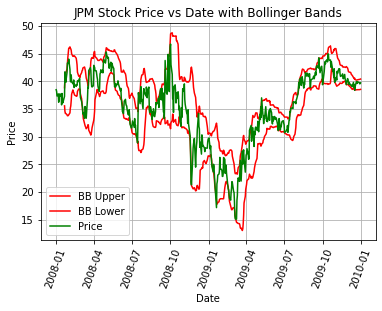

In [167]:
fig, ax = plt.subplots()
ax.plot(top, color='red')
ax.plot(bottom, color='red')
ax.plot(dfJPM, color='green')
ax.grid()
ax.tick_params(axis='x', rotation=70)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["BB Upper", "BB Lower", "Price"])
plt.title("JPM Stock Price vs Date with Bollinger Bands")

In [51]:
dfJPM_norm = dfJPM / dfJPM.iloc[0, :]

In [52]:
sma = dfJPM_norm.rolling(14).mean()

In [53]:
sma_per_price = dfJPM_norm / sma
sma_per_price

,JPM
2008-01-02,NaN
2008-01-03,NaN
2008-01-04,NaN
2008-01-07,NaN
2008-01-08,NaN
...,...
2009-12-24,1.013955
2009-12-28,1.009066
2009-12-29,1.002990
2009-12-30,1.003405


Text(0.5, 1.0, 'SMA of JPM Stock vs Date')

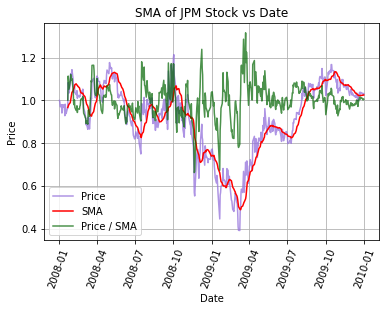

In [162]:
fig, ax = plt.subplots()
ax.plot(dfJPM_norm, color='mediumpurple', alpha=0.75)
ax.plot(sma, color='red')
ax.plot(sma_per_price, color='darkgreen', alpha = 0.7)
ax.grid()
ax.tick_params(axis='x', rotation=70)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["Price", "SMA", "Price / SMA"])
plt.title("SMA of JPM Stock vs Date")

In [81]:
std = dfJPM_norm.rolling(window=5).std()

In [82]:
std

,JPM
2008-01-02,NaN
2008-01-03,NaN
2008-01-04,NaN
2008-01-07,NaN
2008-01-08,0.023004
...,...
2009-12-24,0.010432
2009-12-28,0.003914
2009-12-29,0.004873
2009-12-30,0.004079


Text(0.5, 1.0, 'Standard deviation vs Date')

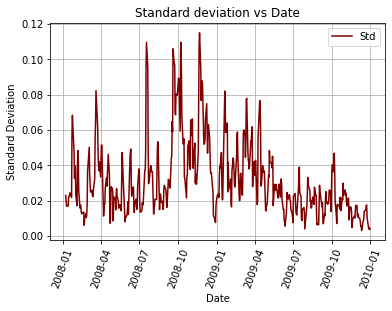

In [157]:
fig, ax = plt.subplots()
#ax.plot(dfJPM_norm, 'C4')
ax.plot(std, color='maroon')
ax.tick_params(axis='x', rotation=70)
#ax.plot(sma_per_price, 'C12')
ax.grid()
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.legend(["Std"])
plt.title("Standard deviation vs Date")


In [119]:
pct = dfJPM_norm.pct_change(14)
pct.head(n=20)

,JPM
2008-01-02,NaN
2008-01-03,NaN
2008-01-04,NaN
2008-01-07,NaN
2008-01-08,NaN
2008-01-09,NaN
2008-01-10,NaN
2008-01-11,NaN
2008-01-14,NaN
2008-01-15,NaN


Text(0.5, 1.0, 'Rolling 14 Day Momentum vs Date')

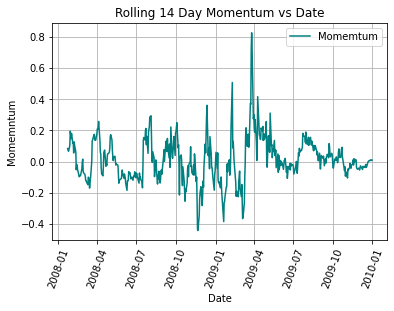

In [156]:
pct = dfJPM_norm.pct_change(14)
fig, ax = plt.subplots()
#ax.plot(dfJPM_norm, 'C4')
ax.plot(pct, color='teal')
ax.tick_params(axis='x', rotation=70)

ax.grid()
plt.xlabel("Date")
plt.ylabel("Momemntum")
plt.legend(["Momemtum"])
plt.title("Rolling 14 Day Momentum vs Date")

AttributeError: 'numpy.ndarray' object has no attribute 'tick_params'

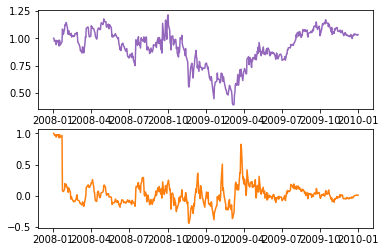

In [173]:
momentum = dfJPM_norm.copy()
momentum.iloc[14:] = (dfJPM_norm.iloc[14:] / dfJPM_norm.values[:-14]) - 1

fig, ax = plt.subplots(2)
ax[0].plot(dfJPM_norm, 'C4')
ax[1].plot(momentum, 'C1')
ax.tick_params(axis='x', rotation=70)
#ax.plot(sma_per_price, 'C12')
ax.grid()
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.legend(["Std"])
plt.title("Rolling 14 Day Standard deviation vs Date")

<Figure size 1440x720 with 0 Axes>

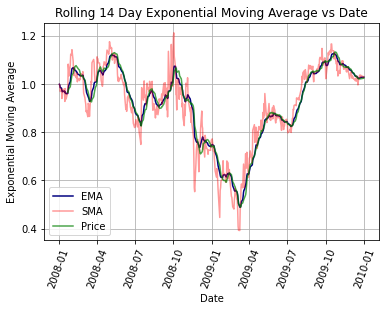

<Figure size 1440x720 with 0 Axes>

In [171]:
ema = dfJPM_norm.ewm(span=14).mean()


fig, ax = plt.subplots()
ax.plot(ema, color='navy')
ax.plot(dfJPM_norm, color='r', alpha=0.4)
ax.plot(sma, color='g', alpha=.7)
ax.tick_params(axis='x', rotation=70)

ax.grid()
plt.xlabel("Date")
plt.ylabel("Exponential Moving Average")
plt.legend(["EMA",'SMA', 'Price'])
plt.title("Rolling 14 Day Exponential Moving Average vs Date")
plt.figure(figsize=(20, 20))

In [178]:
dfTrades = dfJPM.copy()
dfTrades

,JPM
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53
2009-12-30,39.57


In [179]:
dfTrades = dfTrades
dfTrades

,JPM
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53
2009-12-30,39.57


In [180]:
dfTrades2 = dfTrades.shift(-1)
dfTrades2

,JPM
2008-01-02,38.20
2008-01-03,37.33
2008-01-04,37.71
2008-01-07,36.21
2008-01-08,36.72
...,...
2009-12-24,39.75
2009-12-28,39.53
2009-12-29,39.57
2009-12-30,39.70


In [182]:
# dont worry about divide by zeros pandas fills them with NAs which will become 0s later in our code
dfTrades3 = (dfTrades2 - dfTrades) / abs(dfTrades2 - dfTrades) 
dfTrades3

,JPM
2008-01-02,-1.0
2008-01-03,-1.0
2008-01-04,1.0
2008-01-07,-1.0
2008-01-08,1.0
...,...
2009-12-24,-1.0
2009-12-28,-1.0
2009-12-29,1.0
2009-12-30,1.0


In [198]:
dfTradesDiff = (dfTrades3 * 1000).fillna(0)
dfTradesDiff

,JPM
2008-01-02,-1000.0
2008-01-03,-1000.0
2008-01-04,1000.0
2008-01-07,-1000.0
2008-01-08,1000.0
...,...
2009-12-24,-1000.0
2009-12-28,-1000.0
2009-12-29,1000.0
2009-12-30,1000.0


In [202]:
dfTradesDiffcopy = dfTradesDiff.shift(1).fillna(0)
dfTradesDiffcopy

,JPM
2008-01-02,0.0
2008-01-03,-1000.0
2008-01-04,-1000.0
2008-01-07,1000.0
2008-01-08,-1000.0
...,...
2009-12-24,1000.0
2009-12-28,-1000.0
2009-12-29,-1000.0
2009-12-30,1000.0


In [203]:
dfTradesDiff - dfTradesDiffcopy

,JPM
2008-01-02,-1000.0
2008-01-03,0.0
2008-01-04,2000.0
2008-01-07,-2000.0
2008-01-08,2000.0
...,...
2009-12-24,-2000.0
2009-12-28,0.0
2009-12-29,2000.0
2009-12-30,0.0


In [209]:
dfJPM

,JPM
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53
2009-12-30,39.57


In [210]:
start_date

datetime.datetime(2008, 1, 1, 0, 0)

In [211]:
portfolio_values = pd.DataFrame(index=dates)

In [212]:
portfolio_values

""
2008-01-01
2008-01-02
2008-01-03
2008-01-04
2008-01-05
...
2009-12-27
2009-12-28
2009-12-29
2009-12-30


In [213]:
empty_arr = np.zeros(len(portfolio_values))
zeros = pd.DataFrame(empty_arr)
portfolio_values = portfolio_values.join(zeros)

In [214]:
portfolio_values

,0
2008-01-01,NaN
2008-01-02,NaN
2008-01-03,NaN
2008-01-04,NaN
2008-01-05,NaN
...,...
2009-12-27,NaN
2009-12-28,NaN
2009-12-29,NaN
2009-12-30,NaN


In [215]:
orders = dfJPM.copy()
orders.sort_index()

,JPM
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53
2009-12-30,39.57


In [216]:
orders * 0

,JPM
2008-01-02,0.0
2008-01-03,0.0
2008-01-04,0.0
2008-01-07,0.0
2008-01-08,0.0
...,...
2009-12-24,0.0
2009-12-28,0.0
2009-12-29,0.0
2009-12-30,0.0


In [218]:
orders.iloc[0][0] = 1000

In [219]:
orders

,JPM
2008-01-02,1000.00
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53
2009-12-30,39.57


Text(0.5, 1.0, 'JPM Stock Price vs Date with Bollinger Bands')

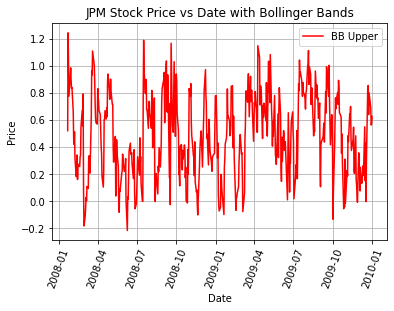

In [220]:
fig, ax = plt.subplots()
ax.plot(bbp, color='red')

ax.grid()
ax.tick_params(axis='x', rotation=70)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["BB Upper", "BB Lower", "Price"])
plt.title("JPM Stock Price vs Date with Bollinger Bands")

In [223]:
orders.iloc[-1][0] = 69000

In [224]:
orders

,JPM
2008-01-02,1000.00
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53
2009-12-30,39.57


In [225]:
orders.pct_change()

,JPM
2008-01-02,NaN
2008-01-03,-0.961800
2008-01-04,-0.022775
2008-01-07,0.010179
2008-01-08,-0.039777
...,...
2009-12-24,0.007828
2009-12-28,-0.004009
2009-12-29,-0.005535
2009-12-30,0.001012
